In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats 
from statsmodels.sandbox.stats.runs import runstest_1samp # para la prueba Runs 
from statsmodels.formula.api import ols #modelo lineal del ANOVA
import statsmodels.api as sm 
from tabulate import tabulate
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind #prueba t para dos muestras independientes 

In [15]:
df = pd.read_excel('res max.xlsx')

Se definen las funciones necesarias para las pruebas

In [29]:
def test_normalitySW(data, variable): # Prueba de Normalizas Shapiro-Wilks 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """
    print(f"\n Análisis de normalidad por Shapiro-Wilk para '{variable}'")
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Estadístico = {shapiro_stat:.4f}, p-valor = {shapiro_p:.4f}")

def test_homogeneityL(var1, var2, name1, name2): # Prueba de levene
    """
    var1 y var2: variables a las que se corroborará homocedasticidad 
    name1 y name2: strings con el nnombre de las variables
    """
    print(f"\n Análisis de homocedasticidad entre '{name1}' y '{name2}'")

    # Prueba de Levene (no asume normalidad)
    levene_stat, levene_p = stats.levene(var1, var2)
    print(f"Levene test: Estadístico = {levene_stat:.4f}, p-valor = {levene_p:.4f}")

def t_test_two_sample(datos1,datos2):#prubea T para dos muestras
    """
    datos1: datos de la primera muestra 
    datos2: datos de la segunda muestra
    """
    
    t_stat, p_value = ttest_ind(datos1, datos2)
    print(f"Prueba t para dos muestras, valor p: {p_value:.4f}")

def kruskal_W(df,Respuesta,Factor):
    """
    
    Parameters
    ----------
    df : Data_Frame
        DESCRIPTION. estructura con los datos del experimento
    Respuesta : String
        DESCRIPTION. nombre de la variable respuesta, key del dataframe
    Factor : String
        DESCRIPTION. nombre del factor, key del dataframe

    Returns
    -------
    None.

    """
    grupos_B = [df[Respuesta][df[Factor] == nivel] for nivel in df[Factor].unique()]
    stat_B, p_B = stats.kruskal(*grupos_B)
    print(f"Kruskal-Wallis para {Factor}: H = {stat_B:.4f}, p = {p_B:.4f}")

def t_test_one(data,mu,variable): #Prueba T para una muestra
    """
    data: arreglo de datos a comparar
    mu: media poblacional o valor de referencia 
    variable: string con el nombre de la variable que se está comparando
    """
    print(f"Prueba T para una sola muestra para {variable}")
    t_stat, p_value = stats.ttest_1samp(data, mu)
    print(f"Estadístico = {t_stat:.4f}, valor_p = {p_value:.4f}")
def random_test(residuos):
    """
    Parameters
    ----------
    residuos : Array
        DESCRIPTION: Residuos del ANOVA 

    Returns
    -------
    None.

    """
    _, p_runs = runstest_1samp(residuos, correction=True)

    print(f"Prueba de Runs: p-valor={p_runs}")
def tukey(respuesta,factor, alfa,n_factor):
    """

    Parameters
    ----------
    respuesta : Array
        DESCRIPTION. Array con los datos de la variable respuesta
    factor : Array
        DESCRIPTION.Array con los niveles del factor 
    alfa : Float
        DESCRIPTION. Valor alfa de comparación 
    n_factor : String
        DESCRIPTION. Nombre del factor

    Returns
    -------
    None.

    """
    
    tukey = pairwise_tukeyhsd(respuesta, factor, alpha=alfa)
    print(f"Prueba Tukey para el factor {n_factor}")
    print(tukey)
    
def kruskal_W(df,Respuesta,Factor):
    """
    
    Parameters
    ----------
    df : Data_Frame
        DESCRIPTION. estructura con los datos del experimento
    Respuesta : String
        DESCRIPTION. nombre de la variable respuesta, key del dataframe
    Factor : String
        DESCRIPTION. nombre del factor, key del dataframe

    Returns
    -------
    None.

    """
    grupos_B = [df[Respuesta][df[Factor] == nivel] for nivel in df[Factor].unique()]
    stat_B, p_B = stats.kruskal(*grupos_B)
    print(f"Kruskal-Wallis para {Factor}: H = {stat_B:.4f}, p = {p_B:.4f}")
    
    
def kruskal_interaccion(df,Respuesta,Factor1,Factor2):
    """
    

    Parameters
    ----------
    df : Data_Frame
        DESCRIPTION. estructura con los datos del experimento
    Respuesta : String
        DESCRIPTION. nombre de la variable respuesta, key del dataframe
    Factor1 : String
        DESCRIPTION. nombre del factor1, key del dataframe
    Factor2 : String
        DESCRIPTION.nombre del factor12, key del dataframe

    Returns
    -------
    None.

    """
    
    df['interaccion'] = df[Factor1].astype(str) + "_" + df[Factor2].astype(str) # se genera una columana con las combinaciones entre factores

    grupos_interaccion = [df[Respuesta][df['interaccion'] == nivel] for nivel in df['interaccion'].unique()]
    stat_int, p_int = stats.kruskal(*grupos_interaccion)
    print(f"Kruskal-Wallis para la interacción {Factor1}x{Factor2} p = {p_int:.4f}")
    

<h3>Punto 1<h3>

In [17]:
test_normalitySW(df['Resistencia'], 'Resistencia')


 Análisis de normalidad por Shapiro-Wilk para 'Resistencia'
Estadístico = 0.9595, p-valor = 0.1165


Para el test de normalidad, se obtiene un valor de p<0.005 en todos los casos, por tanto, se acepta H1. Donde se comprueba la normalidad de los datos de resistencia. 

<h3>Punto 2<h3> modelo fijos

In [18]:
nivel1=df[df['PVA']==10]['Resistencia']
nivel2=df[df['PVA']==12.50]['Resistencia']
nivel3=df[df['PVA']==15]['Resistencia']
_, levene_p = stats.levene(nivel1,nivel2,nivel3)

print(f"Levene test: p-valor = {levene_p:.4f}")

Levene test: p-valor = 0.7435


Para el valor p de la prueba de Levene como p>0.05 se acepta H0. Lo que significa que todas las varianzas son iguales y hay homocedasticidad. 
revisar ---> No hay evidencia significativa para rechazar H0; por lo qu se asume que las varianzas son iguales entre los grupos.

In [19]:
nivel4=df[df['CICLOS']==7]['Resistencia']
nivel5=df[df['CICLOS']==11]['Resistencia']
nivel6=df[df['CICLOS']==15]['Resistencia']
_, levene_p = stats.levene(nivel4,nivel5,nivel6)

print(f"Levene test: p-valor = {levene_p:.4f}")

Levene test: p-valor = 0.0607


Para el valor p de la prueba de Levene como p>0.05 se acepta H0. Lo que significa que todas las varianzas son iguales y hay homocedasticidad. 

Los datos experimentales son independientes, por lo tanto, no se requiere una prueba de independencia. Esta misma se da en el experimento.

In [20]:
modelo = ols('Resistencia ~ C(PVA)*C(CICLOS)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=3)
print(tabulate(anova_table,headers='keys',tablefmt='heavy_grid'))

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃                  ┃   sum_sq ┃   df ┃         F ┃        PR(>F) ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Intercept        ┃ 146604   ┃    1 ┃  51.185   ┃   2.06158e-08 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(PVA)           ┃  57215.5 ┃    2 ┃   9.98802 ┃   0.000354328 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(CICLOS)        ┃  14635.8 ┃    2 ┃   2.55495 ┃   0.0917087   ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(PVA):C(CICLOS) ┃  40009.1 ┃    4 ┃   3.49216 ┃   0.0164945   ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Residual         ┃ 103111   ┃   36 ┃ nan       ┃ nan           ┃
┗━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━━━━━┛


La variable ciclos tiene un efecto no significativo debido al resultado de p en la tabal ANOVA. Sin embargo, no es posible retirar los ciclos debido a que la combinacion entre la concetracion de PVA y ciclos si tiene un efecto significativo dado en la tabla ANOVA, de esta forma se entiende que la resistencia si se ve afectada cuando se maneja una concetracion de PVA  a diferentes ciclos. 


 Análisis de normalidad por Shapiro-Wilk para 'Residuos'
Estadístico = 0.9248, p-valor = 0.0062
Prueba T para una sola muestra para Residuos
Estadístico = -0.0000, valor_p = 1.0000
Prueba de Runs: p-valor=0.777165884119708


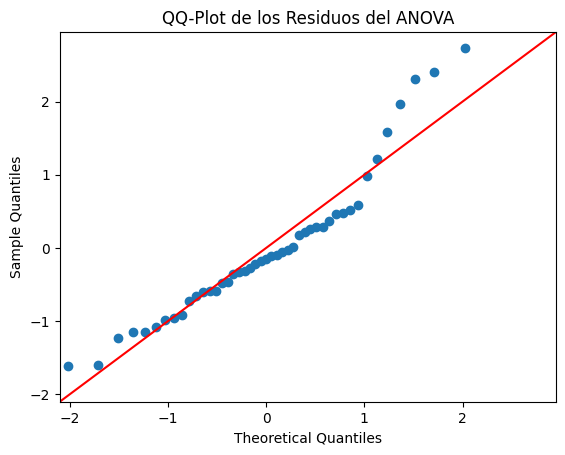

In [26]:
df['Residuos']=modelo.resid

# normalidad en los residuos 

test_normalitySW(df['Residuos'],'Residuos')

t_test_one(df['Residuos'],0,"Residuos")

random_test(df['Residuos'])

sm.qqplot(df['Residuos'], line='45', fit=True)
plt.title("QQ-Plot de los Residuos del ANOVA")
plt.show()


En la prueba de normalidad se obtuvo que los residuos son no normales, sin embargo por medio de la grafica se observa 
Para un modelo de efecto fijos tomamos como refrencia la grafica para analizar la normalidad y para un modelo de muestras aleatorias se debe cumplir al 100% los supuestos dados por las pruebas.

In [30]:
# Prueba de Tukey para acido 
tukey(df["Resistencia"], df["PVA"],0.05,"PVA")



Prueba Tukey para el factor PVA
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  10.0   12.5 -38.6459 0.1891 -91.4305  14.1387  False
  10.0   15.0  60.7404 0.0208   7.9559  113.525   True
  12.5   15.0  99.3863 0.0001  46.6017 152.1709   True
------------------------------------------------------


Se realiza la prueba de comparaciones multiples para el PVA debido a que tiene un efecto significativo, no se realiza respecto a los PVA-CICLOS porque la prueba se realiza entre niveles de un mismo factor. (Además ciclos no tiene un efecto significativo)

<h3>Conclusión<h3>